In [260]:
import pandas as pd
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv('roller_coasters.csv')


In [262]:
m  = df.seating_type.value_counts()
m
#different seating types

Sit Down         2217
Spinning          150
Inverted          122
Suspended          55
Alpine             43
na                 40
Water Coaster      29
Floorless          27
Flying             27
Motorbike          21
Stand Up           20
4th Dimension      18
Wing               17
Bobsleigh          11
Pipeline            5
Name: seating_type, dtype: int64

<AxesSubplot:>

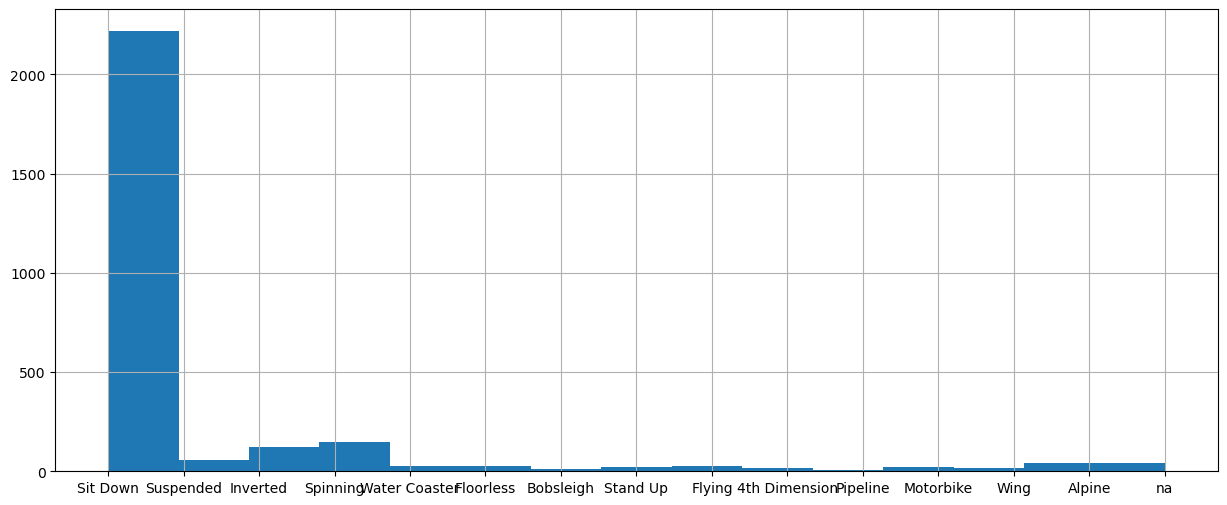

In [263]:
fig, ax = plt.subplots(figsize=(15, 6))
df.seating_type.hist(bins = 15)

In [264]:
# if the speed of the car is small，small to the centrifugal force generated is less than the gravity,the car will have the risk of falling.
# so, it requires a certain speed to ensure safety at the peak.
v = 0
v_list=[]
for i in df['height']:
     v = ((i/2)*10)**0.5
     v_list.append(v)


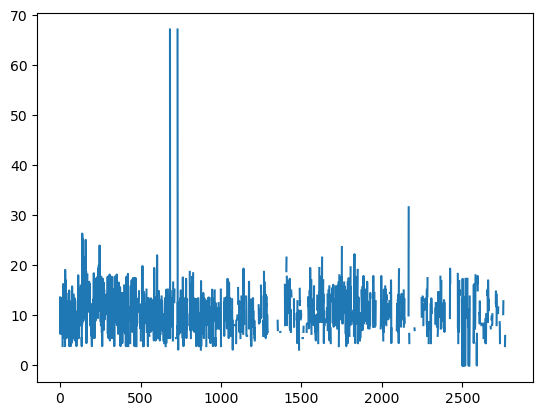

In [265]:
#we analyzed the minimum speed at the peak 

plt.plot(v_list)


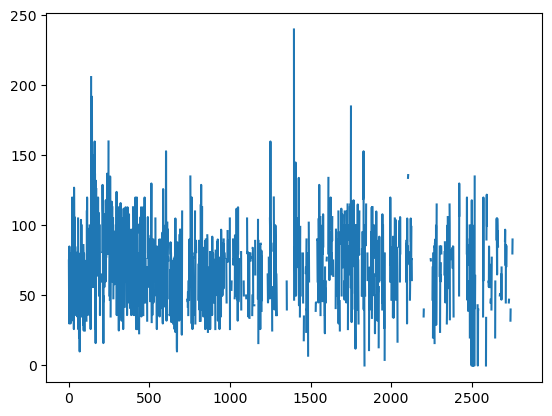

In [266]:
#the average speed
s_list=[]
for i in df['speed']:
    s_list.append(i)
plt.plot(s_list)

<AxesSubplot:>

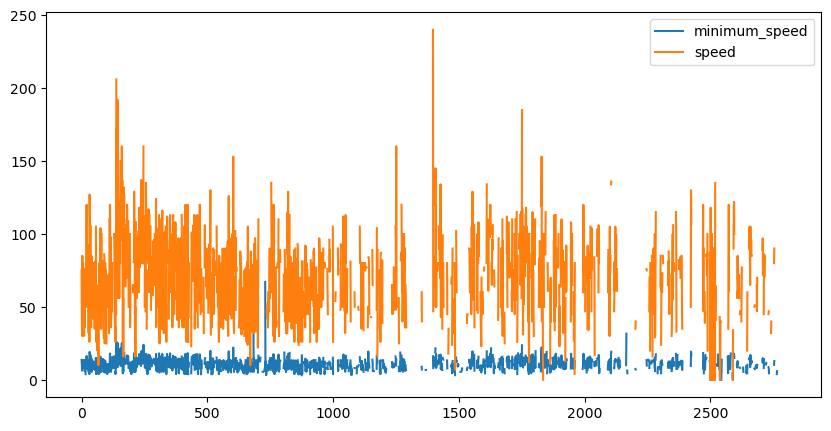

In [281]:
#compare the minimum speed with average speed
Data = {
    'minimum_speed':v_list,
    'speed':s_list,
}
df1 = pd.DataFrame(Data)
fig, ax = plt.subplots(figsize=(10, 5))
df1.plot(ax=ax)

In [267]:
#we found that the average speed was in the range of 5-20
# we delete some extreme data which is above 70 ,it's impossible since the hight is above 900m
a = df.sort_values(by = 'height',ascending = False)

In [268]:
a.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
730,Crazy Train,Steel,Sit Down,40.0,902.0,233.0,0.0,Pinfari,Codona's Amusement Park,status.operating
683,Mighty Mini Mega,Steel,Sit Down,40.0,902.0,233.0,0.0,Pinfari,Adventure Island,status.operating
2166,Velociraptor,na,Sit Down,NaN,200.0,20.0,NaN,Vekoma,Paultons Park,status.operating
138,Kingda Ka,Steel,Sit Down,206.0,139.0,950.0,0.0,Intamin,Six Flags Great Adventure,status.operating
143,Top Thrill Dragster,Steel,Sit Down,192.0,128.0,853.0,0.0,Intamin,Cedar Point,status.operating


In [269]:
a1= a.drop([683,730],inplace = True)
#drop the extreme data

In [270]:
#meterial_type
df.material_type.value_counts()


Steel     2059
na         533
Wooden     189
Hybrid      21
Name: material_type, dtype: int64

In [271]:
b = df.material_type.value_counts()/len(df.material_type)
b

Steel     0.734832
na        0.190221
Wooden    0.067452
Hybrid    0.007495
Name: material_type, dtype: float64

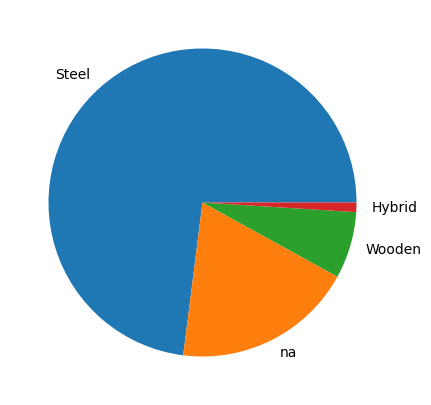

In [272]:
fig, ax=plt.subplots(figsize=(8, 5))
x = np.array([0.73, 0.19, 0.07, 0.01])
plt.pie(x, labels=['Steel', 'na', 'Wooden', 'Hybrid'])
plt.show() #display the pie chart
#steel is the most used material for roller coasters , while hybrid is the least. 